In [105]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.angle_helper as angle_helper
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (DictFormatter, FixedLocator,
                                                 MaxNLocator)

from matplotlib.ticker import FuncFormatter

np.random.seed(19680801)                                                 

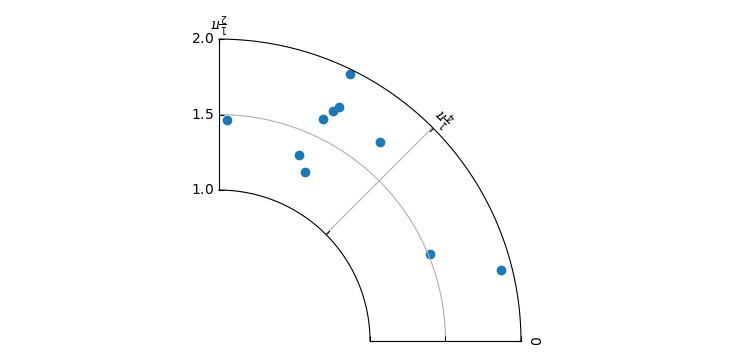

In [2]:
fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

tr = PolarAxes.PolarTransform()

pi = np.pi
angle_ticks = [(0, r"$0$"),
                (.25*pi, r"$\frac{1}{4}\pi$"),
                (.5*pi, r"$\frac{1}{2}\pi$")]
grid_locator1 = FixedLocator([v for v, s in angle_ticks])
tick_formatter1 = DictFormatter(dict(angle_ticks))

grid_locator2 = MaxNLocator(2)

grid_helper = floating_axes.GridHelperCurveLinear(
    tr, extremes=(.5*pi, 0, 2, 1),
    grid_locator1=grid_locator1,
    grid_locator2=grid_locator2,
    tick_formatter1=tick_formatter1,
    tick_formatter2=None)

ax1 = fig.add_subplot(
    111, axes_class=floating_axes.FloatingAxes, grid_helper=grid_helper)
ax1.grid()

# create a parasite Axes whose transData in RA, cz
aux_ax = ax1.get_aux_axes(tr)

aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
# drawn twice, and possibly over some other
# artists. So, we decrease the zorder a bit to
# prevent this.


theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)
plt.show()

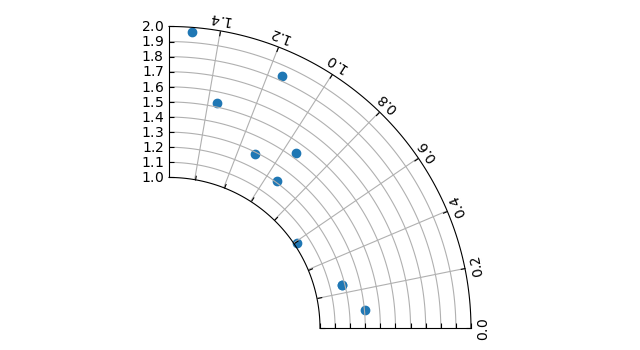

In [53]:
fig = plt.figure(figsize=(8, 4))

tr = PolarAxes.PolarTransform()

grid_helper = floating_axes.GridHelperCurveLinear(
    tr, 
    extremes=(pi/2, 0, 2, 1),
    )

ax1 = fig.add_subplot(
    111,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)
ax1.grid()


aux_ax = ax1.get_aux_axes(tr)

#aux_ax.patch = ax1.patch
#ax1.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)


plt.show()

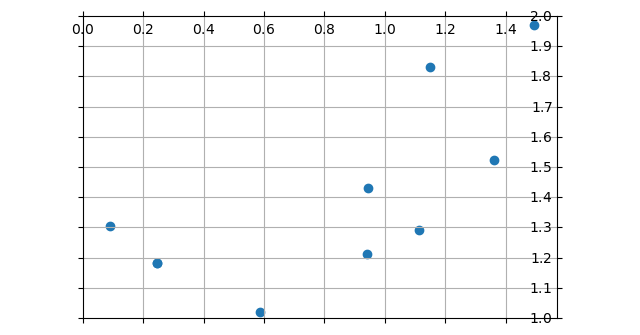

In [66]:
fig = plt.figure(figsize=(8, 4))

### 
tr = Affine2D()
grid_helper = floating_axes.GridHelperCurveLinear(
    tr, 
    extremes=(pi/2, 0, 2, 1),
    )

ax1 = fig.add_subplot(
    111,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)
ax1.grid()


aux_ax = ax1.get_aux_axes(tr)

aux_ax.patch = ax1.patch
ax1.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)



plt.show()

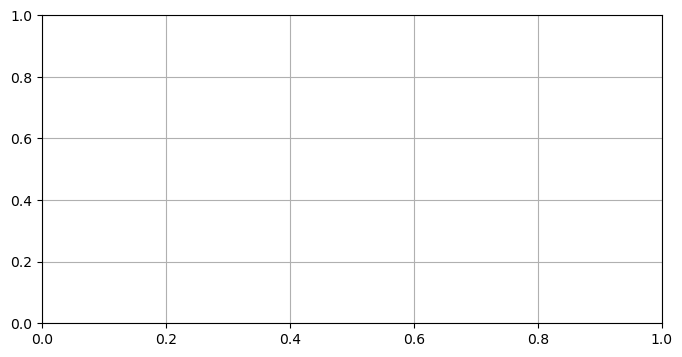

In [67]:
fig = plt.figure(figsize=(8, 4))

### 
ax1 = fig.add_subplot(111)
ax1.grid()


plt.show()

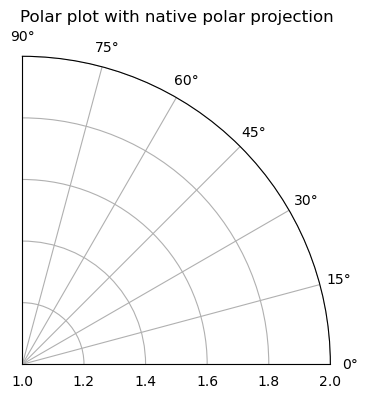

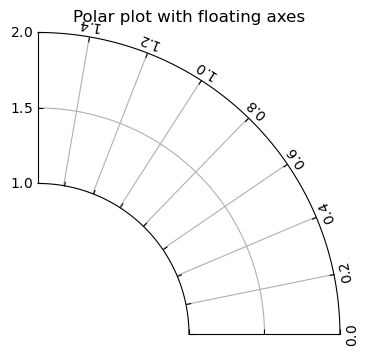

In [90]:
fig = plt.figure(figsize=(8, 4))

### 
ax1 = fig.add_subplot(111, projection='polar')
ax1.set_title('Polar plot with native polar projection')
ax1.set_thetalim(0, pi/2) # ax1.set_xlim(0, pi/2) #Also works
ax1.set_ylim(1, 2)
ax1.grid(True)
plt.show()

########################

fig = plt.figure(figsize=(4, 4))

grid_helper = floating_axes.GridHelperCurveLinear(
    PolarAxes.PolarTransform(),
    extremes=(pi/2, 0, 2, 1),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax1 = fig.add_subplot(
    111,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)
ax1.set_title('Polar plot with floating axes')
ax1.grid()
plt.show()

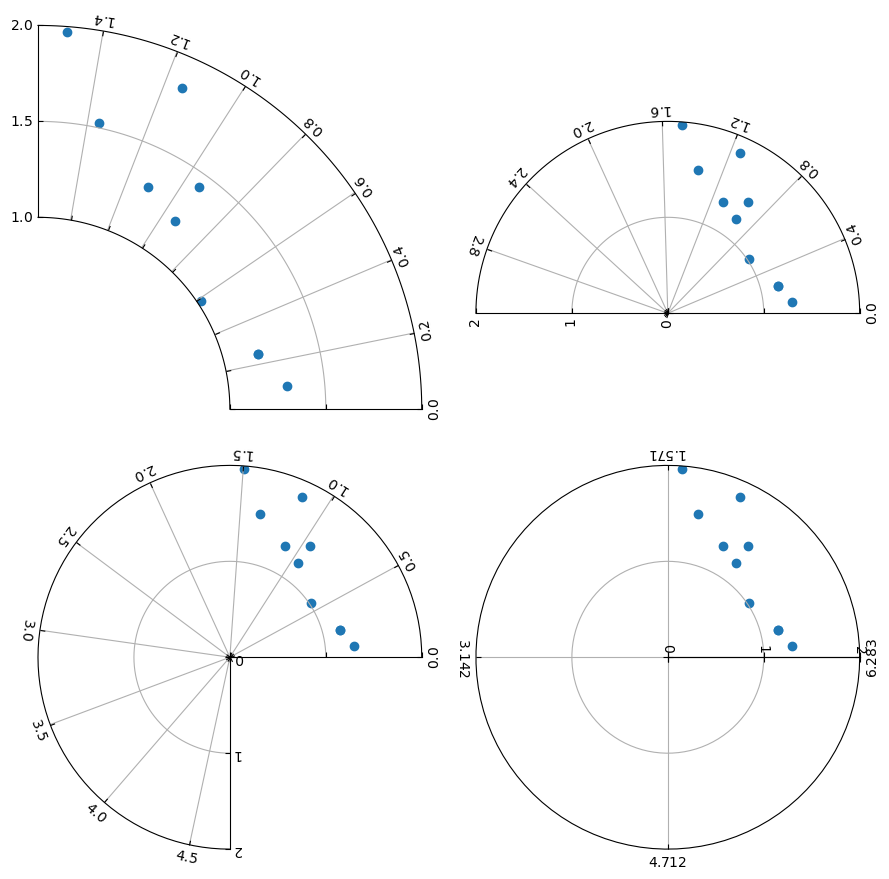

In [111]:
def pi_formatter(x, pos):
    if x == np.pi/2:
        return 'π/2'
    elif x == np.pi:
        return 'π'
    elif x == 3*np.pi/2:
        return '3π/2'
    elif x == 2*np.pi:
        return '2π'
    return f'{x:.2f}'

fig = plt.figure(figsize=(9, 9))


#### 1/2 pi

polar_transform = PolarAxes.PolarTransform()
grid_helper = floating_axes.GridHelperCurveLinear(
    polar_transform,
    extremes=(pi/2, 0, 2, 1),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax1 = fig.add_subplot(
    221,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

aux_ax = ax1.get_aux_axes(polar_transform)
aux_ax.patch = ax1.patch
ax1.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)

ax1.grid()


#### pi
grid_helper = floating_axes.GridHelperCurveLinear(
    PolarAxes.PolarTransform(),
    extremes=(pi, 0, 2, 0),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax2 = fig.add_subplot(
    222,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

aux_ax = ax2.get_aux_axes(polar_transform)
aux_ax.patch = ax2.patch
ax2.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)

ax2.grid()


#### 3/2 pi
grid_helper = floating_axes.GridHelperCurveLinear(
    PolarAxes.PolarTransform(),
    extremes=((3/2)*pi, 0, 2, 0),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax3 = fig.add_subplot(
    223,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

aux_ax = ax3.get_aux_axes(polar_transform)
aux_ax.patch = ax3.patch
ax3.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)

ax3.grid()



#### 2pi
pi_intervals = [np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

grid_helper = floating_axes.GridHelperCurveLinear(
    PolarAxes.PolarTransform(),
    extremes=(2*pi, 0, 2, 0),
    grid_locator1=FixedLocator(pi_intervals),
    grid_locator2=MaxNLocator(nbins=2),
)
ax4 = fig.add_subplot(
    224,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

aux_ax = ax4.get_aux_axes(polar_transform)
aux_ax.patch = ax4.patch
ax4.patch.zorder = 0.9

np.random.seed(42)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax.scatter(theta, radius)


ax4.grid()

#ax1.set_aspect(0.5)
ax2.set_aspect('equal')
ax3.set_aspect('equal')
ax4.set_aspect('equal')


fig.tight_layout()
plt.show()

------

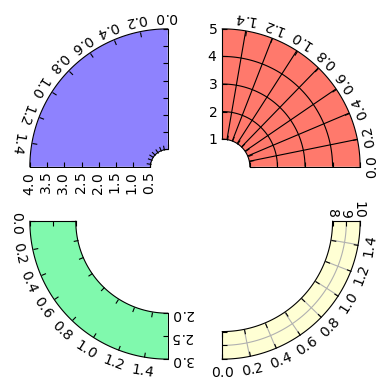

In [164]:


########################

fig = plt.figure(figsize=(4, 4))


transform = PolarAxes.PolarTransform() + Affine2D().rotate_deg(90)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 4, 0.5),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=8),
)
ax1 = fig.add_subplot(
    221,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax1.set_facecolor('xkcd:periwinkle')



transform = PolarAxes.PolarTransform() + Affine2D().rotate_deg(0)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 5, 1),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=4),
)
ax2 = fig.add_subplot(
    222,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax2.set_facecolor('xkcd:salmon')
plt.grid(color='black')

transform = PolarAxes.PolarTransform()  + Affine2D().scale(0.25,0.25).rotate_deg(180)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 3, 2),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax3 = fig.add_subplot(
    223,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax3.set_facecolor('xkcd:seafoam')



transform = PolarAxes.PolarTransform()  + Affine2D().rotate_deg(-90)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 10, 8),
    grid_locator1=None,
    grid_locator2=MaxNLocator(nbins=2),
)
ax4 = fig.add_subplot(
    224,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)
ax4.set_facecolor('xkcd:eggshell')
ax4.grid()


fig.tight_layout()

plt.show()

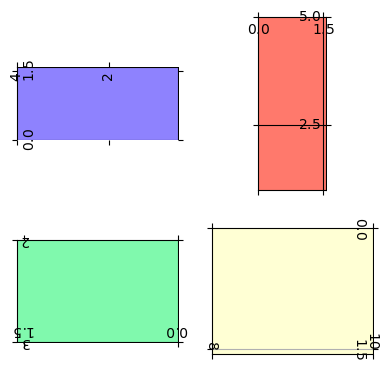

In [175]:
##### In cartesian coordinates

fig = plt.figure(figsize=(4, 4))


transform = Affine2D().rotate_deg(90)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 4, 0.5),
    grid_locator1=MaxNLocator(nbins=1),
    grid_locator2=MaxNLocator(nbins=1),
)
ax1 = fig.add_subplot(
    221,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax1.set_facecolor('xkcd:periwinkle')



transform = Affine2D().rotate_deg(0)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 5, 1),
    grid_locator1=MaxNLocator(nbins=1),
    grid_locator2=MaxNLocator(nbins=1),
)
ax2 = fig.add_subplot(
    222,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax2.set_facecolor('xkcd:salmon')
plt.grid(color='black')

transform = Affine2D().rotate_deg(180)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 3, 2),
    grid_locator1=MaxNLocator(nbins=1),
    grid_locator2=MaxNLocator(nbins=1),
)
ax3 = fig.add_subplot(
    223,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)

ax3.set_facecolor('xkcd:seafoam')



transform = Affine2D().rotate_deg(-90)
grid_helper = floating_axes.GridHelperCurveLinear(
    transform,
    extremes=(pi/2, 0, 10, 8),
    grid_locator1=MaxNLocator(nbins=1),
    grid_locator2=MaxNLocator(nbins=1),
)
ax4 = fig.add_subplot(
    224,
    axes_class=floating_axes.FloatingAxes,
    grid_helper=grid_helper)
ax4.set_facecolor('xkcd:eggshell')
ax4.grid()


fig.tight_layout()

plt.show()

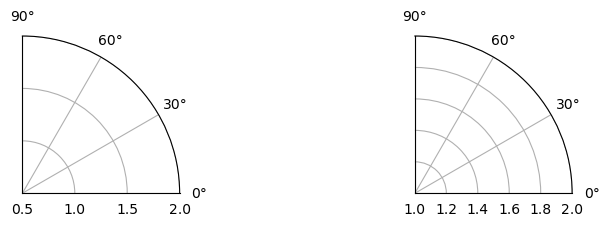

In [ ]:
fig = plt.figure(figsize=(8, 4))

### 
ax1 = fig.add_subplot(221, projection='polar')
ax1.set_thetalim(0, pi/2) # ax1.set_xlim(0, pi/2) #Also works
ax1.set_ylim(0.5, 2)
ax1.grid(True)


ax1 = fig.add_subplot(222, projection='polar')
ax1.set_thetalim(0, pi/2) # ax1.set_xlim(0, pi/2) #Also works
ax1.set_ylim(1, 2)
ax1.grid(True)

fig.tight_layout()

plt.show()

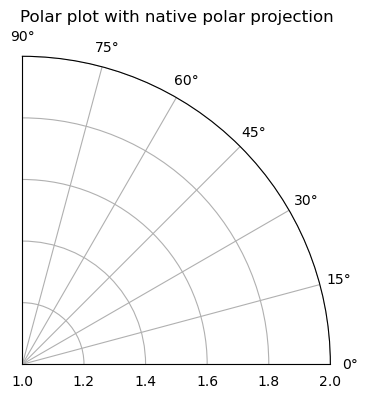